In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
dataset = pd.read_csv('/Users/tonyjason/Downloads/adult.csv')

In [52]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We notice that there are no missing values but from head() we can see that there are few ? which are missing values. We replace it with missing word

In [54]:
dataset = dataset.replace(to_replace = '?',value = 'missing')
dataset.head()

for column in dataset:
    if 'missing' in dataset[column].unique():
        print(column)


workclass
occupation
native.country


/var/folders/16/84_yc3ks3_56wmdv0rgc67b40000gn/T/ipykernel_16495/895203142.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'missing' in dataset[column].unique():


3 columns have missing values in them. We'll impute missing values with the values that appear most

In [55]:
for col in ['workclass', 'occupation', 'native.country']:
    mode = dataset[col].mode()[0]
    dataset[col].replace(to_replace = 'missing',value = mode, inplace=True)

In [56]:
for column in dataset:
    if 'missing' in dataset[column].unique():
        print(column)

/var/folders/16/84_yc3ks3_56wmdv0rgc67b40000gn/T/ipykernel_16495/558916119.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'missing' in dataset[column].unique():


We'll spilt the dataset into X and Y where X contains all columns without income and Y will have income column

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

numeric_change = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for each in numeric_change:
    dataset[each] = label_encoder.fit_transform(dataset[each])
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,<=50K
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,<=50K
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K


In [58]:
dataset["income"] = dataset['income'].map({'<=50K':0, '>50K':1})
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<AxesSubplot:>

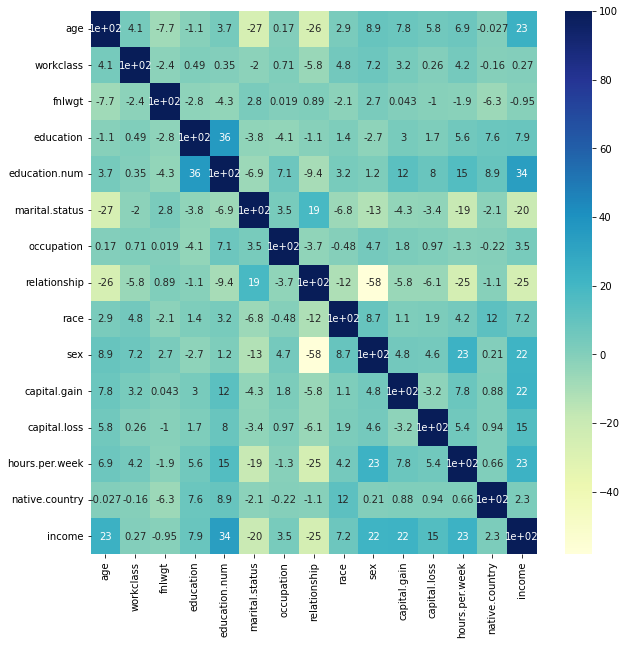

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap((dataset).corr()*100,annot=True,cmap = 'YlGnBu')

In [67]:
dataset.cov()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,186.061400,0.611715,-1.103507e+05,-0.554754,1.281849,-5.471025,0.094230,-5.779473,0.332504,0.570114,7.824819e+03,317.560742,11.580130,-0.022344,1.364997
workclass,0.611715,1.225878,-2.844231e+03,0.020885,0.010071,-0.034134,0.031275,-0.103089,0.045439,0.037291,2.576158e+02,1.179813,0.576899,-0.010895,0.001275
fnlwgt,-110350.685300,-2844.231450,1.114080e+10,-11497.242194,-11729.527298,4475.830232,78.877491,1514.673191,-1907.458702,1333.822718,3.366625e+05,-436030.333167,-24460.426185,-40453.509777,-427.056721
education,-0.554754,0.020885,-1.149724e+04,14.978943,3.576124,-0.223892,-0.634684,-0.067634,0.046423,-0.049815,8.588023e+02,26.116794,2.652712,1.782722,0.131257
education.num,1.281849,0.010071,-1.172953e+04,3.576124,6.618890,-0.268559,0.725199,-0.389207,0.069527,0.014865,2.330008e+03,82.856445,4.705338,1.385016,0.368685
marital.status,-5.471025,-0.034134,4.475830e+03,-0.223892,-0.268559,2.268704,0.209205,0.448820,-0.086954,-0.091643,-4.827041e+02,-20.749935,-3.543274,-0.194090,-0.128360
occupation,0.094230,0.031275,7.887749e+01,-0.634684,0.725199,0.209205,15.782405,-0.239056,-0.016319,0.088714,5.287183e+02,15.495986,-0.631739,-0.053339,0.058815
relationship,-5.779473,-0.103089,1.514673e+03,-0.067634,-0.389207,0.448820,-0.239056,2.581713,-0.158279,-0.440333,-6.872996e+02,-39.535622,-4.939527,-0.104236,-0.172387
race,0.332504,0.045439,-1.907459e+03,0.046423,0.069527,-0.086954,-0.016319,-0.158279,0.720471,0.034827,6.986316e+01,6.464118,0.439236,0.599007,0.026075
sex,0.570114,0.037291,1.333823e+03,-0.049815,0.014865,-0.091643,0.088714,-0.440333,0.034827,0.221376,1.684584e+02,8.639360,1.332182,0.005872,0.043451


In [68]:
X = dataset.drop('income',axis = 1).values
Y = dataset['income'].values
print(Y)

[0 0 0 ... 1 0 0]


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)



In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = classifier.predict(X_test)

[[5846  347]
 [1096  852]]


/Users/tonyjason/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


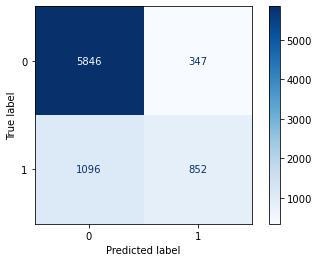

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [240]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6193
        >50K       0.71      0.44      0.54      1948

    accuracy                           0.82      8141
   macro avg       0.78      0.69      0.72      8141
weighted avg       0.81      0.82      0.81      8141



/Users/tonyjason/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


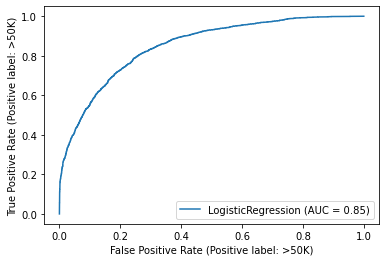

In [27]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,X_test,y_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8227490480284977

In [76]:
print("Training Data score:",classifier.score(X_train,y_train))
print("Testing data score:",classifier.score(X_test,y_test))

Training Data score: 0.8255528255528255
Testing data score: 0.8227490480284977
